In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install -U ipywidgets
!pip install ultralytics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

from matplotlib import pyplot as plt
from PIL import Image

import torch
from torch import nn


from ultralytics import YOLO
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

print("All libraries have been imported", end='\r')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.5 MB/s eta 0:00:00 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 599.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 4.2 MB/s eta 0:00:0

## 1. About YOLO

YOLO, which stands for "You Only Look Once," is an object detection. It's a super fast system that can look at an image just once and identify objects in it.

Imagine you're shown a picture with your friends. YOLO would be like a super sleuth, instantly spotting everyone and even drawing boxes around them to show their location! Unlike some other detectors, YOLO is super speedy, making it great for real-time tasks.

It consists of 3 key networks:
- Backbone: This is the initial part of the network composed of CNNs. It's task is to extract relevant features from the input image. Often, pre-trained models like Darknet or ResNet are used as the backbone, fine-tuned for the object detection task.
- Neck: This middle part of the network. It involves additional CNNs that process and combine the extracted features from the backbone part into preparation for object detection.
- Head: This is the final part of the network. It uses CNNs to predict bounding boxes and class probabilities. It outputs a grid of cells where each cell predicts several bounding boxes and confidence scores for those boxes. The confidence score indicates the model's certainty that a bounding box contains an object and how accurate it believes the predicted box is.


For more on YOLOV8, [check out this awesome YT link](https://www.youtube.com/watch?v=HQXhDO7COj8)

## 2. Load the YOLOV8 medium

YOLO comes is various sizes, but we're going to stick to the medium size.

In [2]:
# code to load the medium weights
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 218MB/s] 


## 3. Train the model

### NOTE: To start training the model you need an access token from [Weights & Biases](https://wandb.ai/).

In [3]:
results = model.train(data='/kaggle/input/cardetection/data.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/cardetection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 13.9MB/s]
2024-03-15 08:19:08.197505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 08:19:08.197630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 08:19:08.473411: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 69.7MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:21<00:00, 167.63it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 174.15it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       7.2G     0.8379      2.494      1.172         22        640: 100%|██████████| 221/221 [01:51<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.08it/s]

                   all        801        944      0.332      0.516       0.36      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       7.5G     0.7839      1.673      1.115         25        640: 100%|██████████| 221/221 [01:47<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]

                   all        801        944      0.388      0.503      0.418      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.51G     0.7761      1.468       1.11         15        640: 100%|██████████| 221/221 [01:46<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.579      0.643      0.651      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.54G     0.7508      1.333      1.093         25        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.685      0.624      0.677      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.54G     0.7334      1.216      1.091         28        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.752      0.625      0.757      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.51G     0.7104      1.118      1.078         20        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.738      0.716      0.775      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.54G     0.7012      1.047      1.063         30        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.826      0.763      0.837      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.55G     0.6759     0.9967      1.058         22        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.849      0.736      0.817      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.56G     0.6588     0.9341      1.047         11        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944        0.9      0.814      0.897      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.51G     0.6593     0.9051      1.042         23        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]

                   all        801        944      0.926      0.851      0.923      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.54G     0.6506     0.8475      1.039         18        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.918      0.835      0.917      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.54G     0.6357     0.8237      1.024         28        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.931       0.84      0.926      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.56G     0.6307     0.7991      1.025         28        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.929      0.845      0.923      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.51G     0.6256     0.7822      1.022         26        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.942      0.855      0.931      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.54G     0.6158      0.757       1.01         23        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.929      0.868      0.939       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.55G      0.605     0.7382       1.01         19        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.925      0.864      0.926       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.54G     0.6014     0.7236      1.012         18        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.945      0.858      0.939      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.51G     0.5881      0.705      1.004         15        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]

                   all        801        944      0.938      0.893       0.94      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.53G     0.5933      0.673      1.007         18        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.935      0.897      0.952      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.54G     0.5816     0.6704      1.003         25        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        801        944      0.931      0.883      0.943      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.55G     0.5777      0.664      0.997         25        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944       0.93      0.905      0.955      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.51G     0.5843     0.6654      1.003         20        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.959      0.898      0.961      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.54G     0.5712     0.6587     0.9915         23        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.958      0.904      0.962      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.55G     0.5774     0.6214     0.9968         17        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.959      0.898      0.958      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.54G     0.5617      0.622     0.9879         22        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]

                   all        801        944      0.943      0.905      0.958      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.51G     0.5522     0.6093     0.9835         21        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.968      0.874      0.954      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.53G     0.5559      0.611     0.9855         13        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.949      0.905      0.959      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.55G     0.5506     0.6019     0.9792         24        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944       0.96      0.916      0.965      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.54G     0.5583     0.5964      0.985         23        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.962      0.914      0.966       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.51G     0.5437     0.5706     0.9836         23        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]

                   all        801        944      0.948      0.913       0.96      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.54G     0.5396     0.5748     0.9758         22        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.954      0.908      0.966      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.55G     0.5302     0.5566     0.9705         18        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.954       0.91      0.963      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.55G     0.5351     0.5462     0.9775         28        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.957      0.914      0.962      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.51G     0.5288     0.5356     0.9765         22        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.962      0.921      0.967      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.55G     0.5205     0.5196     0.9698         18        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.945      0.911      0.968      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.55G     0.5189     0.5242     0.9679         19        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.965      0.918      0.971      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.56G     0.5106     0.5106     0.9693         23        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.956      0.937       0.97      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.51G     0.5118     0.5109     0.9661         17        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        801        944      0.961       0.94      0.972      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.53G     0.5004     0.4966     0.9604         20        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.945       0.95      0.973      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.55G     0.5091      0.503     0.9575         29        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.942      0.933      0.971      0.841


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.54G     0.4977     0.2971     0.9303         13        640: 100%|██████████| 221/221 [01:46<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.959      0.935      0.968      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.51G     0.4965     0.2871     0.9274         14        640: 100%|██████████| 221/221 [01:45<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.958      0.935      0.968      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.53G     0.4913      0.286     0.9242         11        640: 100%|██████████| 221/221 [01:45<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944       0.95      0.949       0.97       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.54G     0.4812     0.2813     0.9223         10        640: 100%|██████████| 221/221 [01:45<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944       0.96       0.95      0.972      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.55G     0.4763     0.2761     0.9176         12        640: 100%|██████████| 221/221 [01:45<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.953      0.947      0.971      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       7.5G     0.4687     0.2698     0.9133         10        640: 100%|██████████| 221/221 [01:45<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.954      0.956      0.972      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.53G      0.465      0.259     0.9113         13        640: 100%|██████████| 221/221 [01:45<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.946       0.95      0.973       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.54G     0.4569     0.2555     0.9079         14        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944       0.96      0.949      0.973      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.54G     0.4507     0.2497     0.9014         15        640: 100%|██████████| 221/221 [01:46<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.956      0.948      0.974      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.51G     0.4426     0.2418     0.8991         12        640: 100%|██████████| 221/221 [01:45<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]

                   all        801        944      0.957      0.946      0.975      0.852



50 epochs completed in 1.663 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]


                   all        801        944       0.96      0.945      0.975      0.852
           Green Light        801        122      0.898       0.79      0.912      0.581
             Red Light        801        108      0.869      0.806      0.855      0.542
       Speed Limit 100        801         52      0.962      0.986      0.995      0.909
       Speed Limit 110        801         17      0.971          1      0.995      0.932
       Speed Limit 120        801         60          1      0.999      0.995      0.938
        Speed Limit 20        801         56      0.959      0.982      0.987      0.861
        Speed Limit 30        801         74      0.948      0.984      0.991      0.932
        Speed Limit 40        801         55      0.961      0.964      0.993      0.896
        Speed Limit 50        801         71      0.989       0.93      0.981      0.884
        Speed Limit 60        801         76      0.947      0.947       0.98        0.9
        Speed Limit 7

lr/pg0,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▄▅▆▆▆▇▇▇▇▇▇███████████████████████████
metrics/mAP50-95(B),▁▁▄▄▅▆▆▇▇▇▇▇▇▇▇▇████████████████████████
metrics/precision(B),▁▂▄▅▅▆▇▇▇███████████████████████████████
metrics/recall(B),▁▁▃▃▄▅▅▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▆▆▆▅▅▅▄▄▄▄▄▄▄▃▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁


In [4]:
metrics = model.val()

Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 489.75it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:21<00:00,  2.32it/s]


                   all        801        944      0.958      0.946      0.975      0.854
           Green Light        801        122      0.895      0.795      0.919      0.582
             Red Light        801        108      0.863      0.806      0.849      0.546
       Speed Limit 100        801         52      0.963      0.992      0.995       0.92
       Speed Limit 110        801         17      0.969          1      0.995      0.911
       Speed Limit 120        801         60          1      0.999      0.995       0.94
        Speed Limit 20        801         56      0.956      0.982      0.987      0.862
        Speed Limit 30        801         74      0.948      0.985      0.991      0.934
        Speed Limit 40        801         55      0.946      0.964      0.993      0.896
        Speed Limit 50        801         71      0.985       0.93      0.981      0.885
        Speed Limit 60        801         76      0.946      0.947       0.98        0.9
        Speed Limit 7

## 4. Plotting the results

In [9]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png", "F1_curve.png", "results.png"]

### 4.1 Curves for the training set

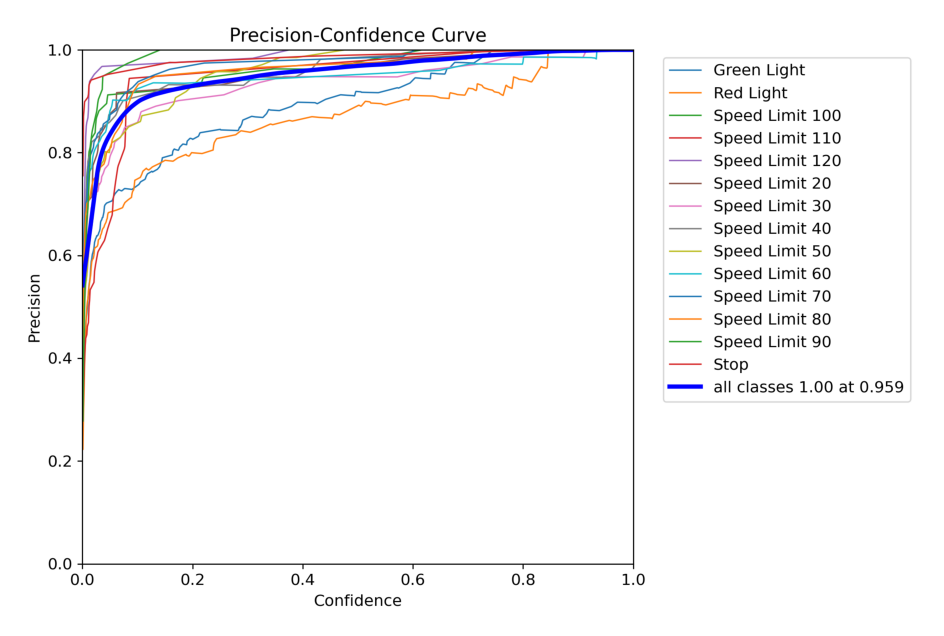

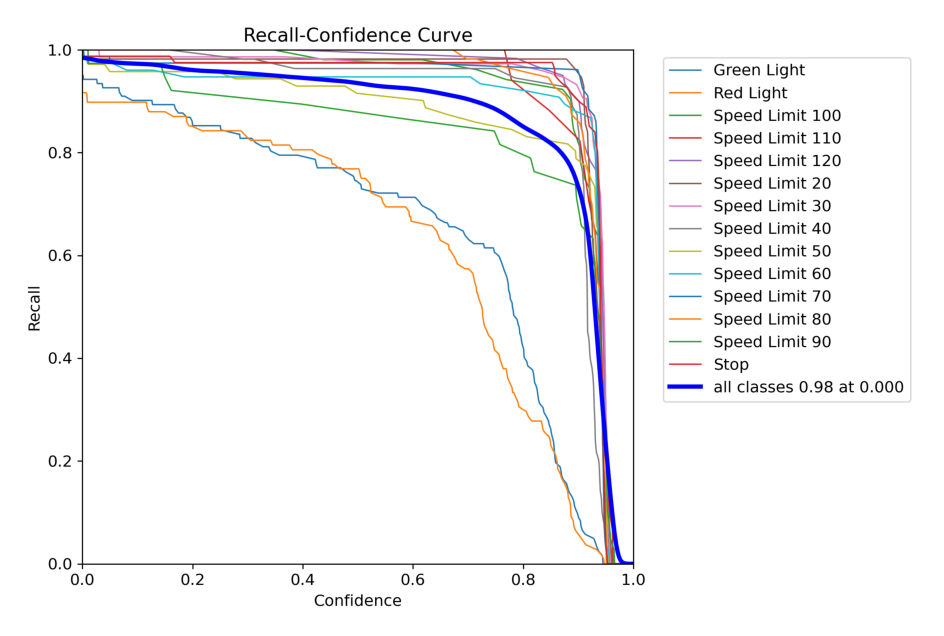

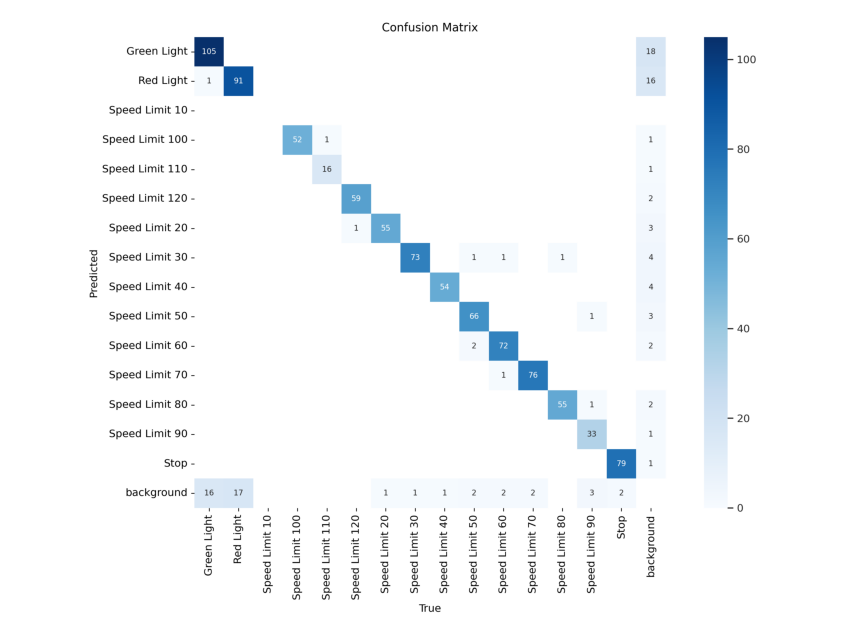

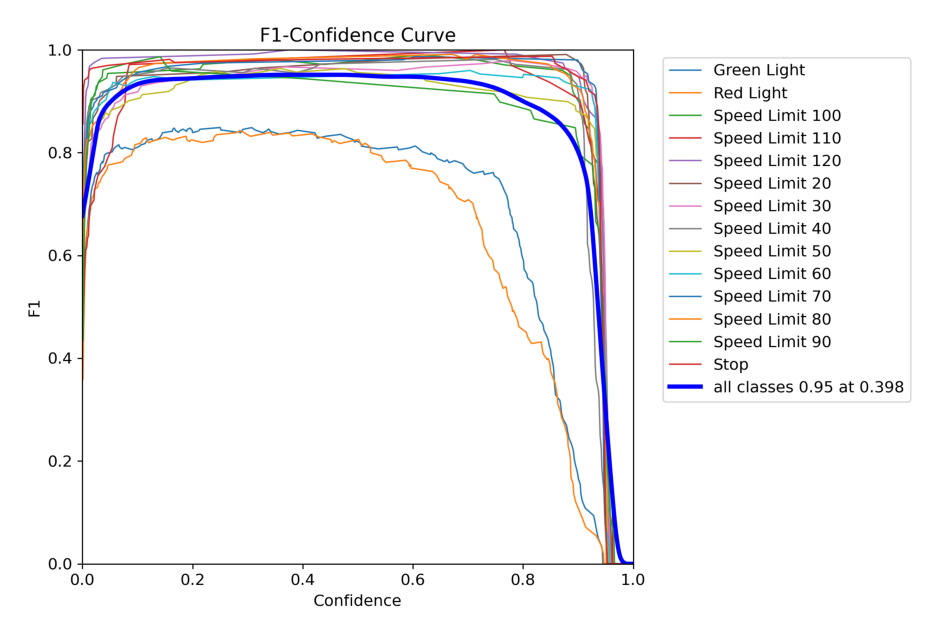

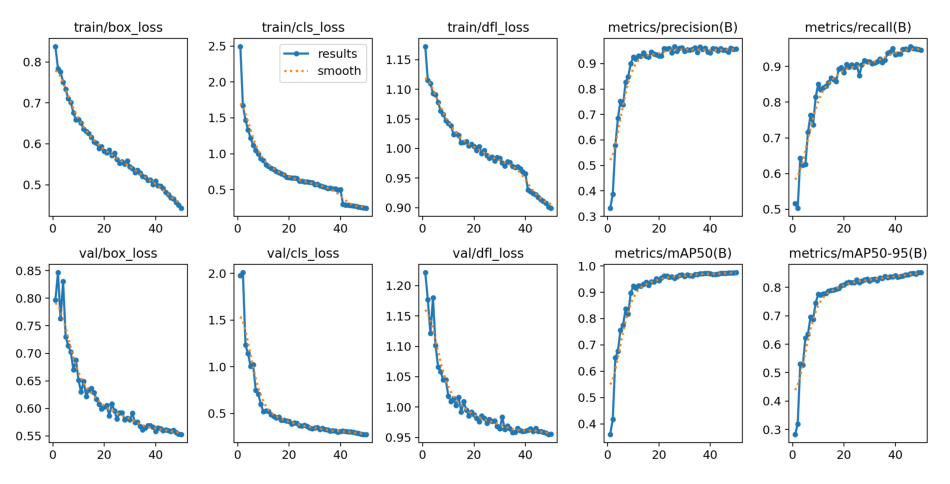

In [10]:
for i in list_of_metrics:

    image = Image.open(f'/kaggle/working/runs/detect/train/{i}')
   
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(image)
    plt.show()

### 4.2 Explanation for the curves

#### Precision-Confidence curve
The first curve is the **Precision-Confidence** curve. This curve mainly visualizes the performance of a model on a classification task. The curve in the graph shows that as the model's confidence in its classification increases, the precision of the classification also increases. This means that the model is more likely to be correct when it is very confident in its classification. The legend of the thick blue line "all classes 1.00 at 0.959" means that the model has a precision of 1.0 (or 100%) for all classes (presumably including speed limit signs) at a confidence level of 0.959 (or 95.9%).

#### Recall-Confidence curve
The second curve is the **Recall-Confidence** curve. This curve mainly visualizes the ability of the model to identify all the relevant classes from a dataset. It refers to the likelihood of the model correctly identifying an image that contains a speed limit sign. As you see the curves, it shows that as the model’s confidence in its classification increases, the recall also increases. This means the model is more likely to correctly identify a speed limit sign when it has high confidence in its prediction.

#### Confusion Matrix
The third diagram is the **Confusion Matrix**. This matrix mainly visualizes how correct the model's predictions are compared to the actual labels. The ones are the diagonal are know are the True Positive, meaning that the model has correctly predicted the actual class. Other recordings of predictions other than the diagonal means that the model confuses the predicted class with the actual class. The confusion matrix for this model shows that the diagonal is more "dense". This means that the model can correctly identify the classes at great accuracy.

#### F1-Confidence curve
The fourth diagram is the **F1-Confidence** curve. This curve mainly visualizes the model’s performance on a classification task that considers both precision and recall. FYI, precision is the proportion of positive identifications that are truly correct, while recall is the proportion of actual positives that are identified correctly. The curve indicates that the model’s F1 score increases as its confidence in its classifications grows.

---

### 4.3 Curves for the eval set

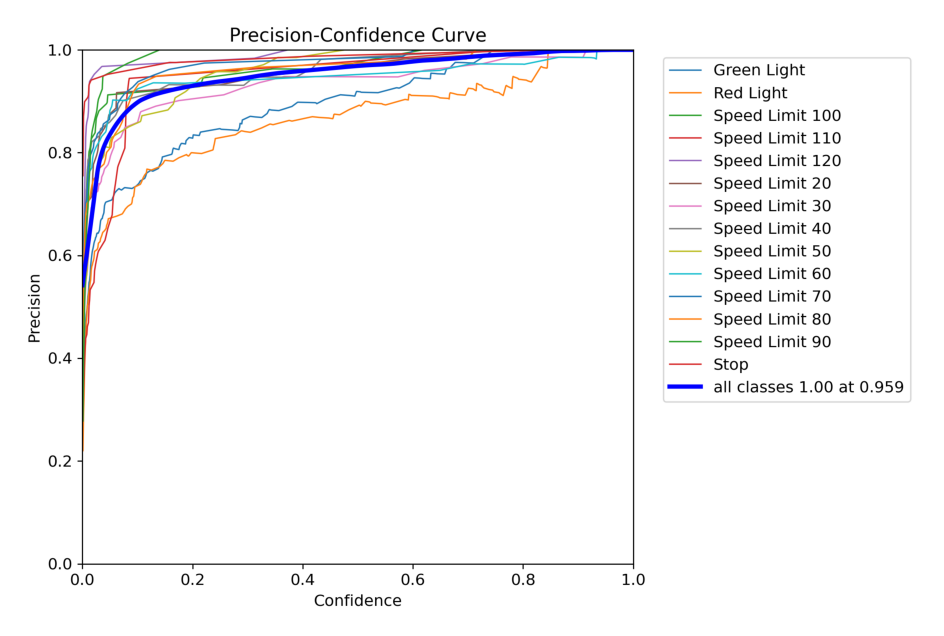

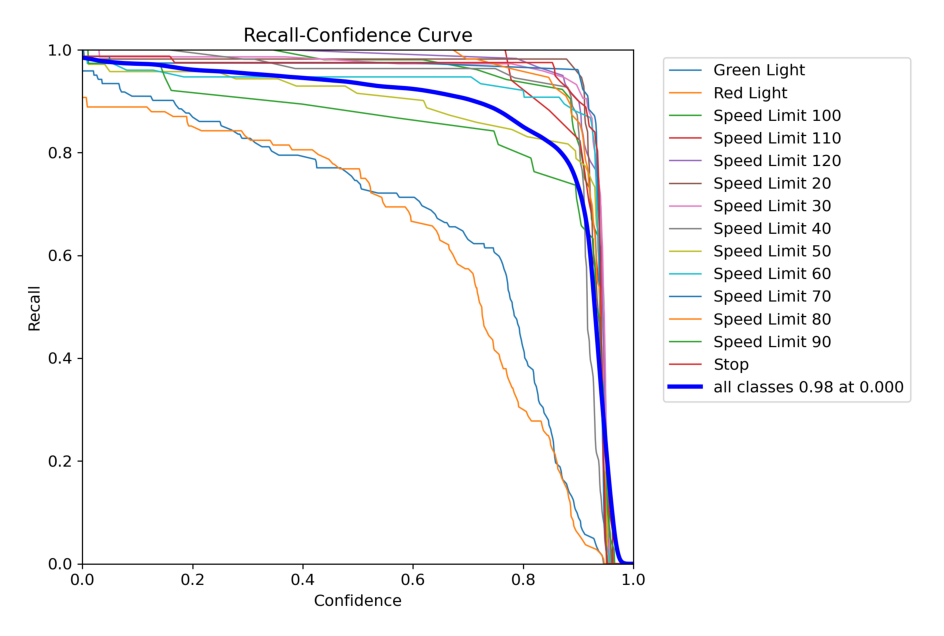

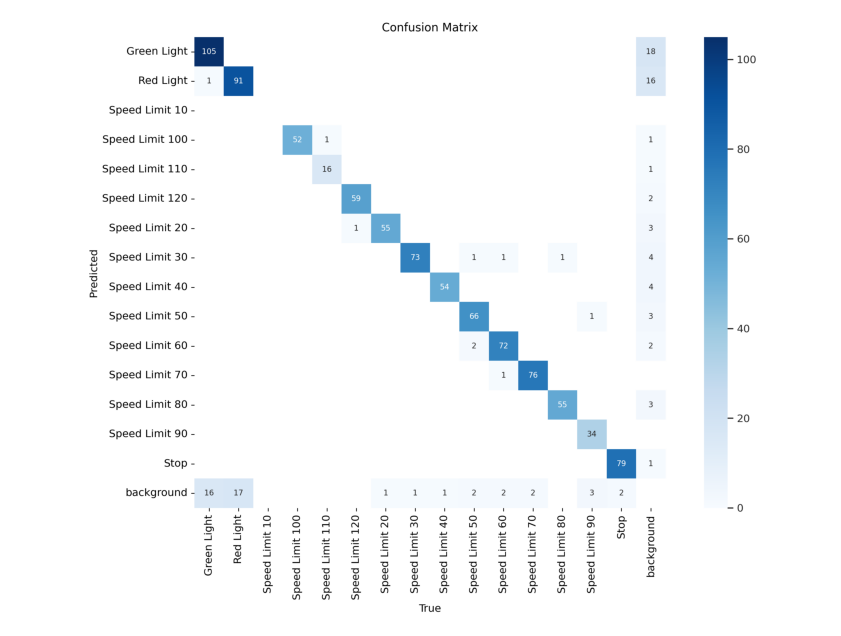

In [14]:
list_of_eval_metrics = list_of_metrics[:-2] 
for i in list_of_eval_metrics:

    image = Image.open(f'/kaggle/working/runs/detect/train2/{i}')
   
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(image)
    plt.show()

---

## 5. Test the images

Time to test our images. 

To ease the process, we create a pipeline called `detection_pipeline()` that takes in the list of images needed for testing. Since all outputs of the yolo model have a `plot()` method in-built, we utilize the plot to display the results along with the bounding boxes and confidence score.

In [15]:
def detection_pipline(images):
    output = model(images)
    
    # Visualize the results
    for i, r in enumerate(output):
        # Plot results image
        im_bgr = r.plot()  # BGR-order numpy array
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

        plt.axis('off')
        plt.imshow(im_rgb)
        plt.show()

In [22]:
test_imgs = [
    "/kaggle/input/cardetection/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg",
    "/kaggle/input/cardetection/test/images/00003_00045_00019_png.rf.3120c19400c889f8dfd507e2f6f16995.jpg",
    "/kaggle/input/cardetection/test/images/00000_00004_00027_png.rf.339c3f63582ed2785e9d0740821e561e.jpg",
    "/kaggle/input/cardetection/test/images/00000_00002_00012_png.rf.d345a307460a0fa32e159261cffa0e88.jpg",
    "/kaggle/input/cardetection/test/images/00007_00002_00021_png.rf.3e8282102bcbc3465886670d060ce78f.jpg",
    "/kaggle/input/cardetection/test/images/00008_00007_00009_png.rf.8289199643586993b107ff888e950eab.jpg"
]


0: 640x640 1 Speed Limit 30, 31.5ms
1: 640x640 1 Speed Limit 60, 31.5ms
2: 640x640 1 Speed Limit 20, 31.5ms
3: 640x640 1 Speed Limit 20, 31.5ms
4: 640x640 1 Speed Limit 100, 31.5ms
5: 640x640 1 Speed Limit 120, 31.5ms
Speed: 2.9ms preprocess, 31.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


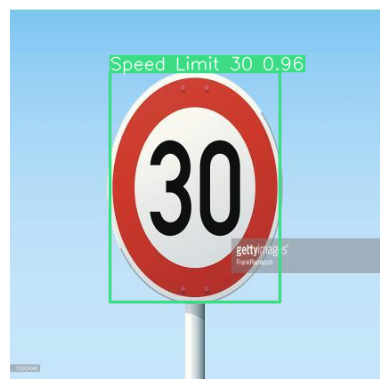

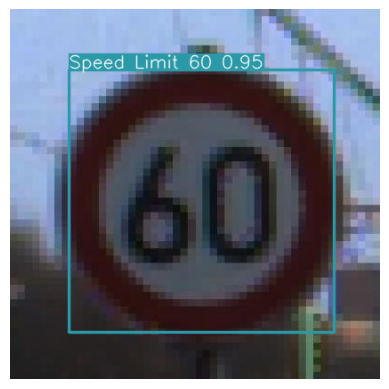

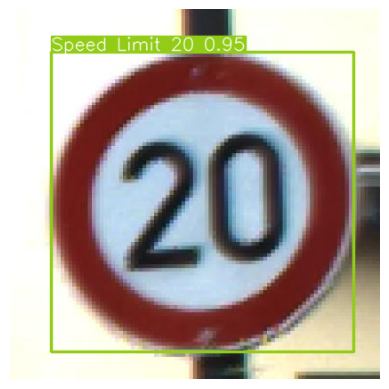

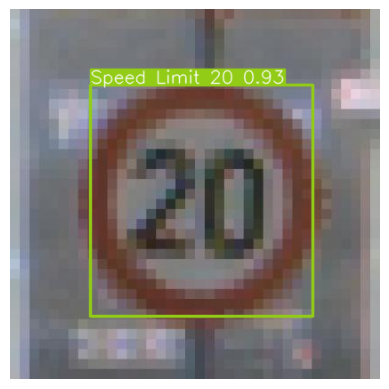

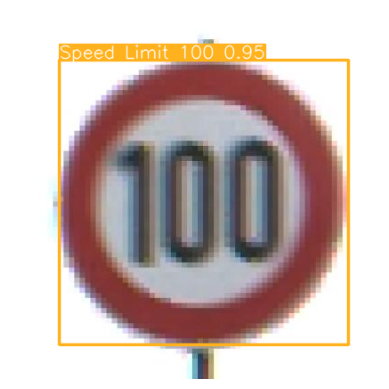

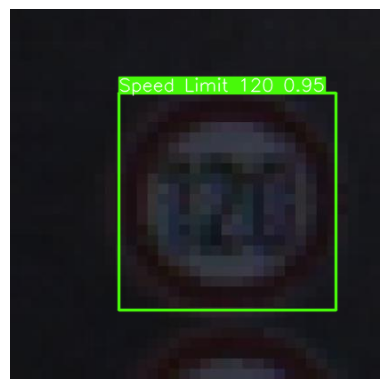

In [23]:
detection_pipline(test_imgs)